# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

### Chundi Himakiran Kumar

---
## Step 0: Loading The Data

In [1]:
# Load pickled data
import pickle
import random

# Reading files

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Checking the data
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration



### Basic Summary of the Data Set Using Python

In [2]:

import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image
image_shape = X_train[0].shape

# Unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43



### Exploratory visualization of the dataset

In [3]:
### Data exploration visualization using matplotlib.

import matplotlib.pyplot as plt
import pandas as pd

# Visualizations will be shown in the notebook.
%matplotlib inline

# Reading data using pandas
tr_data = pd.read_pickle(training_file)
val_data = pd.read_pickle(validation_file)
test_data = pd.read_pickle(testing_file)
#print(type(tr_data))

# Making a copy of the data to run visualizations
ctd = copy_tr_data = tr_data.copy()
cvd = copy_val_data = val_data.copy()
cted = copy_test_data = test_data.copy()

# See all the keys of the dictionary ..expecting features,labels
print("Structure of the dictionary is {}".format(ctd.keys()))

print("Shape of Features is {}".format(ctd['features'].shape))
print("Shape of Labels is {}".format(ctd['labels'].shape))
print("Shape of coords is {}".format(ctd['coords'].shape))
print("Shape of sizes is {}".format(ctd['sizes'].shape))


Structure of the dictionary is dict_keys(['coords', 'labels', 'features', 'sizes'])
Shape of Features is (34799, 32, 32, 3)
Shape of Labels is (34799,)
Shape of coords is (34799, 4)
Shape of sizes is (34799, 2)


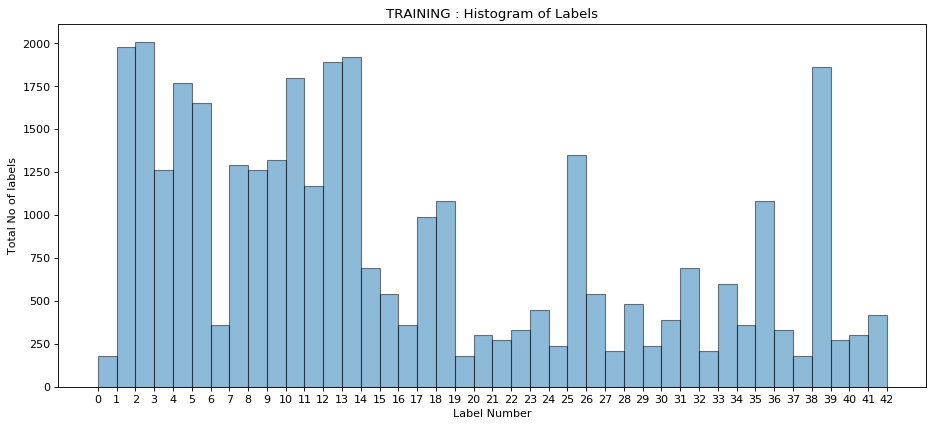

In [4]:
# Visualizing Training Labels Histogram
label_nos = np.unique(ctd['labels'])
#print(label_nos)
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
plt.hist(ctd['labels'],bins=label_nos,alpha=0.5, histtype='bar', ec='black',density=False)
plt.title('TRAINING : Histogram of Labels')
plt.xlabel('Label Number')
plt.ylabel('Total No of labels')
plt.xticks(label_nos) 
plt.show()


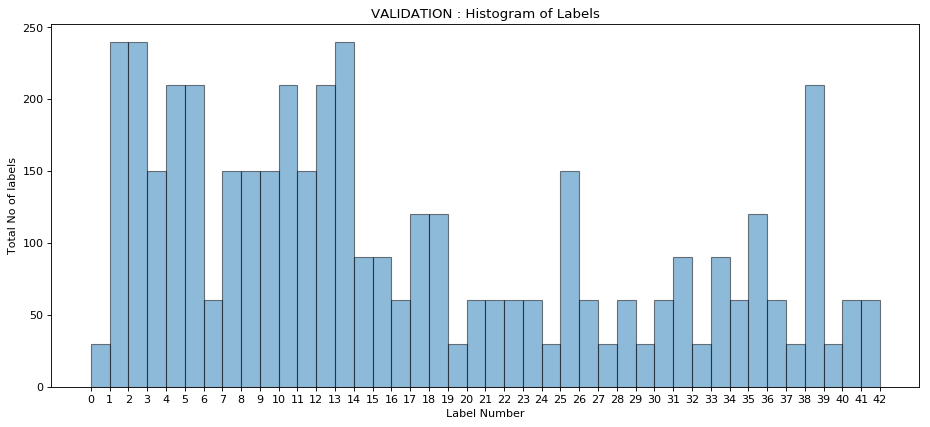

In [5]:
# Visualizing Validation Labels Histogram
label_nos = np.unique(cvd['labels'])
#print(label_nos)
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
plt.hist(cvd['labels'],bins=label_nos,alpha=0.5, histtype='bar', ec='black')
plt.title('VALIDATION : Histogram of Labels')
plt.xlabel('Label Number')
plt.ylabel('Total No of labels')
plt.xticks(label_nos)

plt.show()

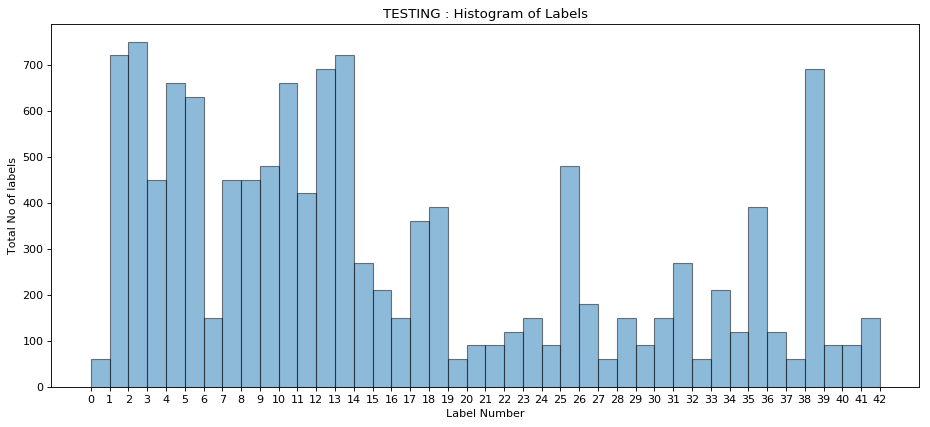

In [6]:
# Visualizing TESTING Labels Histogram
label_nos = np.unique(cted['labels'])
#print(label_nos)
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
plt.hist(cted['labels'],bins=label_nos,alpha=0.5, histtype='bar', ec='black')
plt.title('TESTING : Histogram of Labels')
plt.xlabel('Label Number')
plt.ylabel('Total No of labels')
plt.xticks(label_nos)
plt.show()


### Analysis of above histograms

In [7]:
# Reading the labes from the csv file
label_file = 'signnames.csv'
label_df = pd.read_csv(label_file)
#label_df.info()
print(" The following labels are are in majority in the training data ")
print("{} , {} , {}, {}, {} ".format(label_df.iloc[1]['SignName'],label_df.iloc[2]['SignName'],label_df.iloc[13]['SignName'],label_df.iloc[14]['SignName'],label_df.iloc[38]['SignName']))

# We shall therefore try and augment the training data set such that we make up for the less occuring images


 The following labels are are in majority in the training data 
Speed limit (30km/h) , Speed limit (50km/h) , Yield, Stop, Keep right 



### Checking the frequency of occurence of each label

In [8]:
num_values,num_labels = np.histogram(ctd['labels'],bins=label_nos)

In [9]:
print(num_labels)
print(len(num_labels))
print()
print(num_values)
print(len(num_values))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
43

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  420]
42


In [10]:
# As the value of the 42nd image is missing we shall add it manually
num_values=np.append(num_values,420)
print(num_values)

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  420  420]



### Viewing the images in the training,validation and testing sets

TRAINING SET
VALIDATION SET
 TEST SET 


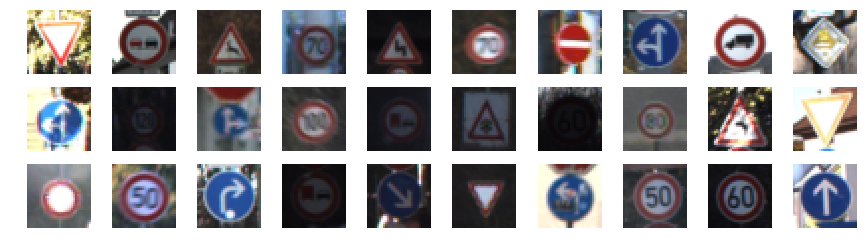

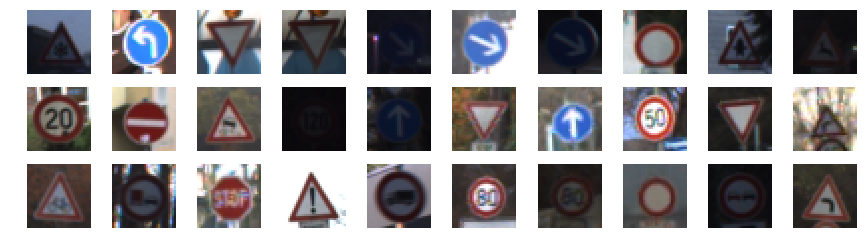

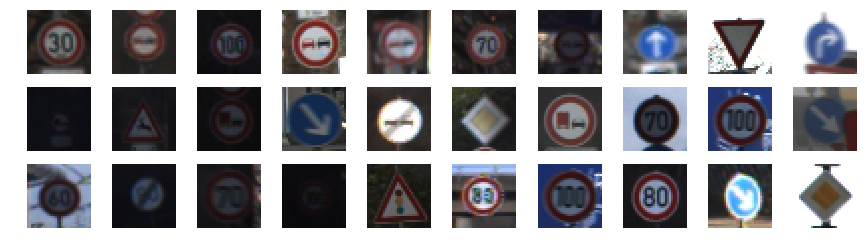

In [11]:
# Viewing random images in train, valid and test data
image_indexes=[]
count=0
for each in range(0,30):    
    i = random.randint(0,len(X_train)-1)
    image_indexes.append(i)
fig, axarr = plt.subplots(3,10, figsize=(15,4));
row = 0
col = 0
print("TRAINING SET");
for each in image_indexes:
    axarr[row][col].imshow(X_train[each]);
    axarr[row][col].axis('off')
    col+=1
    if(col==10):
        col=0
        row+=1
row=0
col=0
image_indexes=[]
for each in range(0,30):    
    i = random.randint(0,len(X_valid)-1)
    image_indexes.append(i)
fig, axarr2 = plt.subplots(3,10, figsize=(15,4));
print("VALIDATION SET");
for each in image_indexes:
    axarr2[row][col].imshow(X_valid[each]);
    axarr2[row][col].axis('off')
    col+=1
    if(col==10):
        col=0
        row+=1
row=0
col=0
image_indexes=[]
for each in range(0,30):    
    i = random.randint(0,len(X_test))
    image_indexes.append(i)
fig, axarr3 = plt.subplots(3,10, figsize=(15,4));
print(" TEST SET ")
for each in image_indexes:
    axarr3[row][col].imshow(X_test[each]);
    axarr3[row][col].axis('off')
    col+=1
    if(col==10):
        col=0
        row+=1

----

## Step 2: Design and Test a Model Architecture



### Pre-process the Data Set : Augmentation + Normalization

In [12]:
# We shall try to augment the training set with the images corresponding to the labels poorly represented in the 
# label histogram of the raining data set
# To do that we choose 1250 as the baseline so that the training data set has minimum 1250 images of each type in it

# Augmenting training data set using num_labels and num_values
# This code goes thru the entire training set, and checks each image and its frequency.
# If it's frequency is less than 1250 we shall add copies of the same
# so that the total no of this images will be 1250.

num=1250
X_data_aug, y_data_aug = [],[]
for i in range(0,len(X_train)-1):
    img = X_train[i]
    label = y_train[i]
    #print("Label : {}".format(label))
    if(label in num_labels):
        index=np.where(num_labels==label)
        #print(index[0])
        num_of_images = num_values[index][0]
        #print(num_of_images)
        aug_number = 1250-num_of_images
        #print(aug_number)
        # If the num_of_images > 1250 the aug_number will be negative and code below
        # will not run
        for j in range(0,aug_number):
            X_data_aug.append(img)
            y_data_aug.append(label)
        # Below steps so that we dont augment the same image again
        num_labels = np.delete(num_labels,index[0])
        num_values = np.delete(num_values,index[0])
        #print(aug_labels)
        #print(aug_values)
X_train_aug,y_train_aug = np.array(X_data_aug),np.array(y_data_aug)
X_train = np.concatenate((X_train, X_train_aug))
y_train = np.concatenate((y_train, y_train_aug))

# Checking
print("Number of training examples =", len(X_train))
        

Number of training examples = 58440


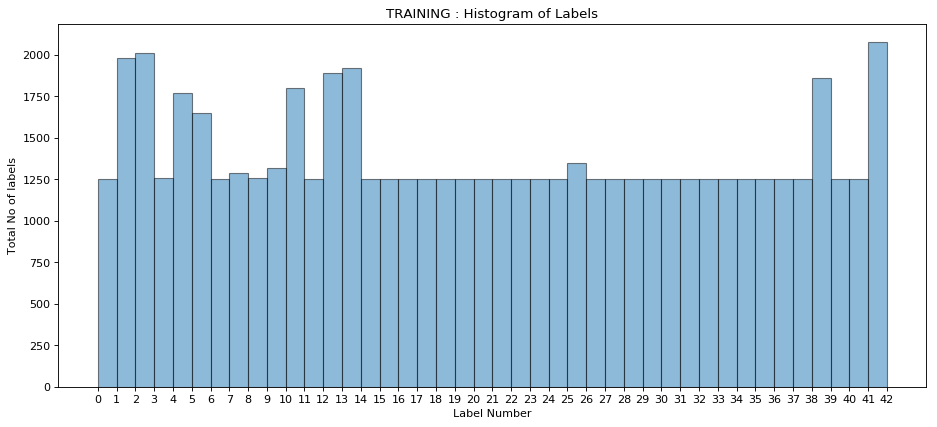

In [13]:
# Visualizing Training Labels Histogram After AUGMENTATION
label_nos = np.unique(y_train)
#print(label_nos)
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
plt.hist(y_train,bins=label_nos,alpha=0.5, histtype='bar', ec='black',density=False)
plt.title('TRAINING : Histogram of Labels')
plt.xlabel('Label Number')
plt.ylabel('Total No of labels')
plt.xticks(label_nos) 
plt.show()


### Augmentation of Validation data 

In [14]:
# As the training data has been augmented, we need to increase the size of validation data so that 
# validation data is 20% of training data
# These we will do by taking in random samples from training data and augmenting validation data
# Augmenting training data set using above transformations
# num = how many extra training data points
num = int((0.20 * len(X_train)) - len(X_valid))
print("Shortfall in Validation data : {}".format(num))
def augment_valid_data(num):
    X_valid_aug, y_valid_aug = [],[]
    for i in range(0,num):
        j = random.randint(0,len(X_train)-1)
        img =  X_train[j]
        label = y_train[j]
        X_valid_aug.append(img)
        y_valid_aug.append(label)
    return np.array(X_valid_aug),np.array(y_valid_aug)
X_valid_aug,y_valid_aug = augment_valid_data(num)
X_valid = np.concatenate((X_valid, X_valid_aug))
y_valid = np.concatenate((y_valid, y_valid_aug))

# Checking
print("Number of training examples =", len(X_train))
print("Number of labels =", len(y_train))
print("Number of validation examples =", len(X_valid))
print("Number of labels =", len(y_valid))

Shortfall in Validation data : 7278
Number of training examples = 58440
Number of labels = 58440
Number of validation examples = 11688
Number of labels = 11688


### Normalization of Training,Validation and Testing data 

In [15]:
# # Normalizing the image data
print("Mean before normalizing {}".format(np.mean(X_train)))

f128 = np.float32(128)
X_train = (X_train.astype(np.float32)-f128)/f128
X_valid = (X_valid.astype(np.float32)-f128)/f128
X_test = (X_test.astype(np.float32)-f128)/f128

print("Mean after normalizing {}".format(np.mean(X_train)))


Mean before normalizing 77.41467293511508
Mean after normalizing -0.3951948881149292


In [16]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

### Using LeNet Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1_var = conv1
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2_var = conv2
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits,conv1_var,conv2_var

### One Hot encoding of labels

In [18]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Training, Validation and Testing the Model

In [19]:

rate = 0.001

logits,conv1_var,conv2_var = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Training the Model

In [21]:
EPOCHS = 20
BATCH_SIZE = 64
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        print("EPOCH {} ...".format(i+1))
        training_accuracy = evaluate(X_train, y_train)
        print("Training Accuracy   = {:.3f}".format(training_accuracy)) 
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Final')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy   = 0.954
Validation Accuracy = 0.900

EPOCH 2 ...
Training Accuracy   = 0.977
Validation Accuracy = 0.939

EPOCH 3 ...
Training Accuracy   = 0.989
Validation Accuracy = 0.951

EPOCH 4 ...
Training Accuracy   = 0.989
Validation Accuracy = 0.953

EPOCH 5 ...
Training Accuracy   = 0.993
Validation Accuracy = 0.957

EPOCH 6 ...
Training Accuracy   = 0.994
Validation Accuracy = 0.968

EPOCH 7 ...
Training Accuracy   = 0.993
Validation Accuracy = 0.959

EPOCH 8 ...
Training Accuracy   = 0.991
Validation Accuracy = 0.954

EPOCH 9 ...
Training Accuracy   = 0.995
Validation Accuracy = 0.960

EPOCH 10 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.970

EPOCH 11 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.970

EPOCH 12 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.972

EPOCH 13 ...
Training Accuracy   = 0.995
Validation Accuracy = 0.966

EPOCH 14 ...
Training Accuracy   = 0.993
Validation Accuracy = 0.962

EPOCH 15 ...
Tra

### Validation Set Accuracy 

In [22]:
print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Validation Accuracy = 0.976


### Testing Set Accuracy 

In [23]:
with tf.Session() as sess:
    saver.restore(sess, './Final')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./Final
Test Accuracy = 0.928


---

## Step 3: Testing the Model on New Images



### Load and Output the Images

Image 0 = 30kmph.jpg
Image 1 = 50kmph.jpg
Image 2 = keepright.jpg
Image 3 = proadsign.jpeg
Image 4 = yield.jpg


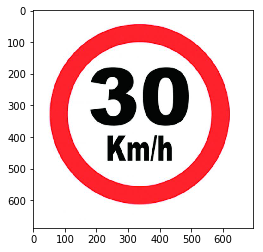

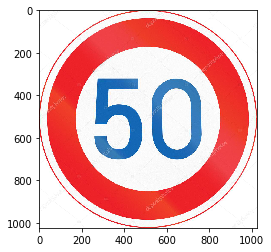

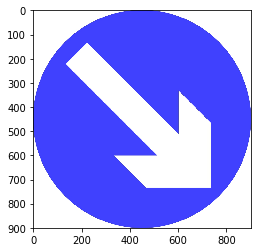

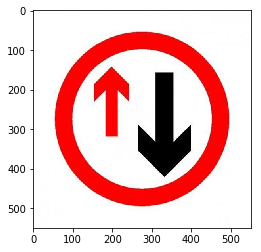

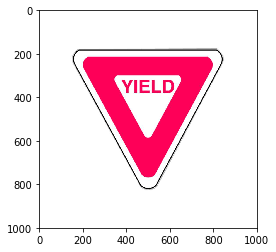

In [24]:
import matplotlib.image as mpimg
import scipy.misc as scms
import numpy as np
import matplotlib.pyplot as plt

# Web Images
no_of_img = 5
X_test_web = np.zeros((no_of_img,32,32,3),dtype=np.uint8)
dir = 'web_images/'
names = ['30kmph.jpg',\
         '50kmph.jpg',\
         'keepright.jpg',\
         'proadsign.jpeg',\
         'yield.jpg']
y_test_web = np.array([1,2,38,12,13])
for name,i in zip(names,range(0,5)):
    image = mpimg.imread(dir+name)
    print("Image {} = {}".format(i,name))
    plt.figure()
    plt.imshow(image)
    # Resize to 32x32 and store in the array of test data
    resized_image = scms.imresize(image,(32,32,3))
    X_test_web[i] = resized_image


### Predict the Sign Type for Each Image

In [25]:
# Normalize web images
import tensorflow as tf
f128 = np.float32(128)
X_test_web = (X_test_web.astype(np.float32)-f128)/f128

pred = tf.argmax( logits, 1 )

with tf.Session() as sess:
    saver.restore(sess, './Final')
    output = sess.run(pred, feed_dict={
        x: X_test_web})
    
print("Output :")
print("Expected: \n\
       1 (Speed limit (30km/h)), \n\
       2 (Speed limit (50km/h)), \n\
       38 (Keep right), \n\
       12 (Priority road), \n\
       13 (Yield)")
print('Actual:')
print(output)
    

INFO:tensorflow:Restoring parameters from ./Final
Output :
Expected: 
       1 (Speed limit (30km/h)), 
       2 (Speed limit (50km/h)), 
       38 (Keep right), 
       12 (Priority road), 
       13 (Yield)
Actual:
[ 0  2 38  1 13]


### Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images.
with tf.Session() as sess:
    saver.restore(sess, './Final')
    test_accuracy = evaluate(X_test_web, y_test_web)
    print("Web Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./Final
Web Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
## Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
## Feel free to use as many code cells as needed.

top_k = tf.nn.top_k(tf.nn.softmax(logits),5)

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './Final')
    output = sess.run(top_k, feed_dict={
        x: X_test_web})

print("Top Five softmax probabilities:")

for i in range(5):
    print()
    print( "{}:".format( names[i] ) )
    print( "Probabilities")
    print(output.values[i])
    print( "Corresponding labels")
    print(output.indices[i])

INFO:tensorflow:Restoring parameters from ./Final
Top Five softmax probabilities:

30kmph.jpg:
Probabilities
[  9.99991298e-01   4.54638075e-06   2.64601204e-06   1.60653201e-06
   4.70864876e-08]
Corresponding labels
[ 0 29 35  8 20]

50kmph.jpg:
Probabilities
[  1.00000000e+00   1.56494162e-09   2.05774271e-14   3.87393525e-15
   8.14368842e-17]
Corresponding labels
[ 2  1 39  5 37]

keepright.jpg:
Probabilities
[  1.00000000e+00   8.05112109e-38   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
Corresponding labels
[38 13  0  1  2]

proadsign.jpeg:
Probabilities
[  7.43243158e-01   2.56756812e-01   1.02373159e-08   2.53837073e-11
   9.84191895e-13]
Corresponding labels
[ 1  5 28 19 24]

yield.jpg:
Probabilities
[  1.00000000e+00   4.46236754e-12   2.77369324e-15   3.98032978e-19
   4.63768472e-20]
Corresponding labels
[13 12 42 32  1]
